In [1]:
import pandas as pd

In [2]:
df=pd.DataFrame(columns=['calory','breakfast','lunch','dinner','exercise','body_shape'])

In [4]:
df.loc[0]=[1200,1,0,0,2,'skinny']
df.loc[1]=[2800,1,1,1,1,'normal']
df.loc[2]=[3500,2,2,1,0,'fat']
df.loc[3]=[1400,0,1,0,3,'skinny']
df.loc[4]=[5000,2,2,2,0,'fat']
df.loc[5]=[1300,0,0,1,2,'skinny']
df.loc[6]=[3000,1,0,1,1,'normal']
df.loc[7]=[4000,2,2,2,0,'fat']
df.loc[8]=[2600,0,2,0,0,'normal']
df.loc[9]=[3000,1,2,1,1,'fat']

In [5]:
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,skinny
1,2800,1,1,1,1,normal
2,3500,2,2,1,0,fat
3,1400,0,1,0,3,skinny
4,5000,2,2,2,0,fat
5,1300,0,0,1,2,skinny
6,3000,1,0,1,1,normal
7,4000,2,2,2,0,fat
8,2600,0,2,0,0,normal
9,3000,1,2,1,1,fat


In [9]:
x=df[['calory','breakfast','lunch','dinner','exercise']]

In [11]:
x.head(10)

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


In [12]:
y=df[['body_shape']]

In [13]:
y.head(10)

,body_shape
0,skinny
1,normal
2,fat
3,skinny
4,fat
5,skinny
6,normal
7,fat
8,normal
9,fat


In [14]:
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(x)

In [15]:
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [16]:
import numpy as np

In [17]:
features=x_std.T

In [19]:
convariance_matrix=np.cov(features)
convariance_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [20]:
eig_vals,eig_vecs=np.linalg.eig(convariance_matrix)

In [21]:
eig_vecs

array([[-0.508005  , -0.0169937 , -0.84711404,  0.11637853,  0.10244985],
       [-0.44660335, -0.36890361,  0.12808055, -0.63112016, -0.49973822],
       [-0.38377913,  0.70804084,  0.20681005, -0.40305226,  0.38232213],
       [-0.42845209, -0.53194699,  0.3694462 ,  0.22228235,  0.58954327],
       [ 0.46002038, -0.2816592 , -0.29450345, -0.61341895,  0.49601841]])

In [23]:
eig_vals

array([4.0657343 , 0.8387565 , 0.07629538, 0.27758568, 0.2971837 ])

In [24]:
eig_vals[0]/sum(eig_vals)

0.7318321731427544

project data point onto selected Eigen vector

In [25]:
projected_x=x_std.dot(eig_vecs.T[0])
projected_x

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [29]:
result=pd.DataFrame(projected_x,columns=['pc1'])

In [30]:
result['y_axis']=0.0
result['label']=y

In [31]:
result.head(10)

,pc1,y_axis,label
0,2.226009,0.0,skinny
1,0.018143,0.0,normal
2,-1.762966,0.0,fat
3,2.735424,0.0,skinny
4,-3.027115,0.0,fat
5,2.147026,0.0,skinny
6,0.371425,0.0,normal
7,-2.592399,0.0,fat
8,0.393478,0.0,normal
9,-0.509025,0.0,fat


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,1,'pca result')

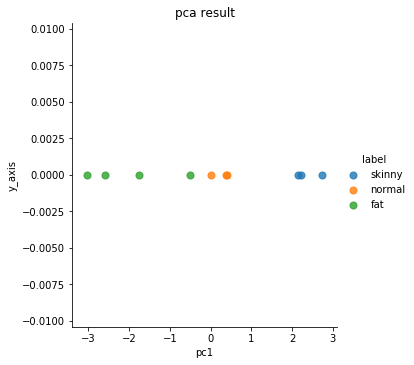

In [33]:
sns.lmplot('pc1','y_axis',data=result,fit_reg=False,
          scatter_kws={"s":50},
          hue="label")
plt.title('pca result')

下面是直接用sciket-learn实现pca

In [34]:
from sklearn import decomposition

In [36]:
pca=decomposition.PCA(n_components=1)
sklearn_pca_x=pca.fit_transform(x_std)

In [38]:
sklearn_pca_x

array([[-2.22600943],
       [-0.0181432 ],
       [ 1.76296611],
       [-2.73542407],
       [ 3.02711544],
       [-2.14702579],
       [-0.37142473],
       [ 2.59239883],
       [-0.39347815],
       [ 0.50902498]])

In [39]:
sklearn_result=pd.DataFrame(sklearn_pca_x,columns=['pc1'])

In [40]:
sklearn_result['y-axis']=0.0
sklearn_result['label']=y

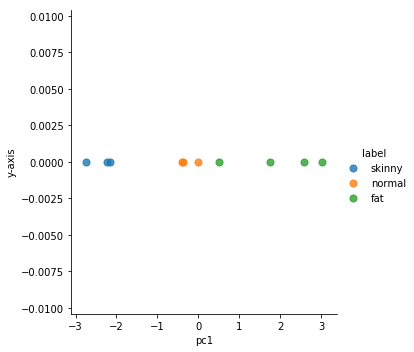

In [41]:
sns.lmplot('pc1','y-axis',data=sklearn_result,fit_reg=False,
          scatter_kws={"s":50},
          hue="label")